In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

2025-04-29 10:25:20.570047: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df = pd.read_csv("../data/kc_house_data.csv")
df 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [7]:
print ("df size : ", df.shape)
print ("df columns : ", df.columns)
df.info()

df size :  (21613, 21)
df columns :  Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [8]:
df = df.drop('date', axis=1) 
df = df.drop('id', axis=1) 
df.columns 

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [12]:
print (df.isnull().sum())

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


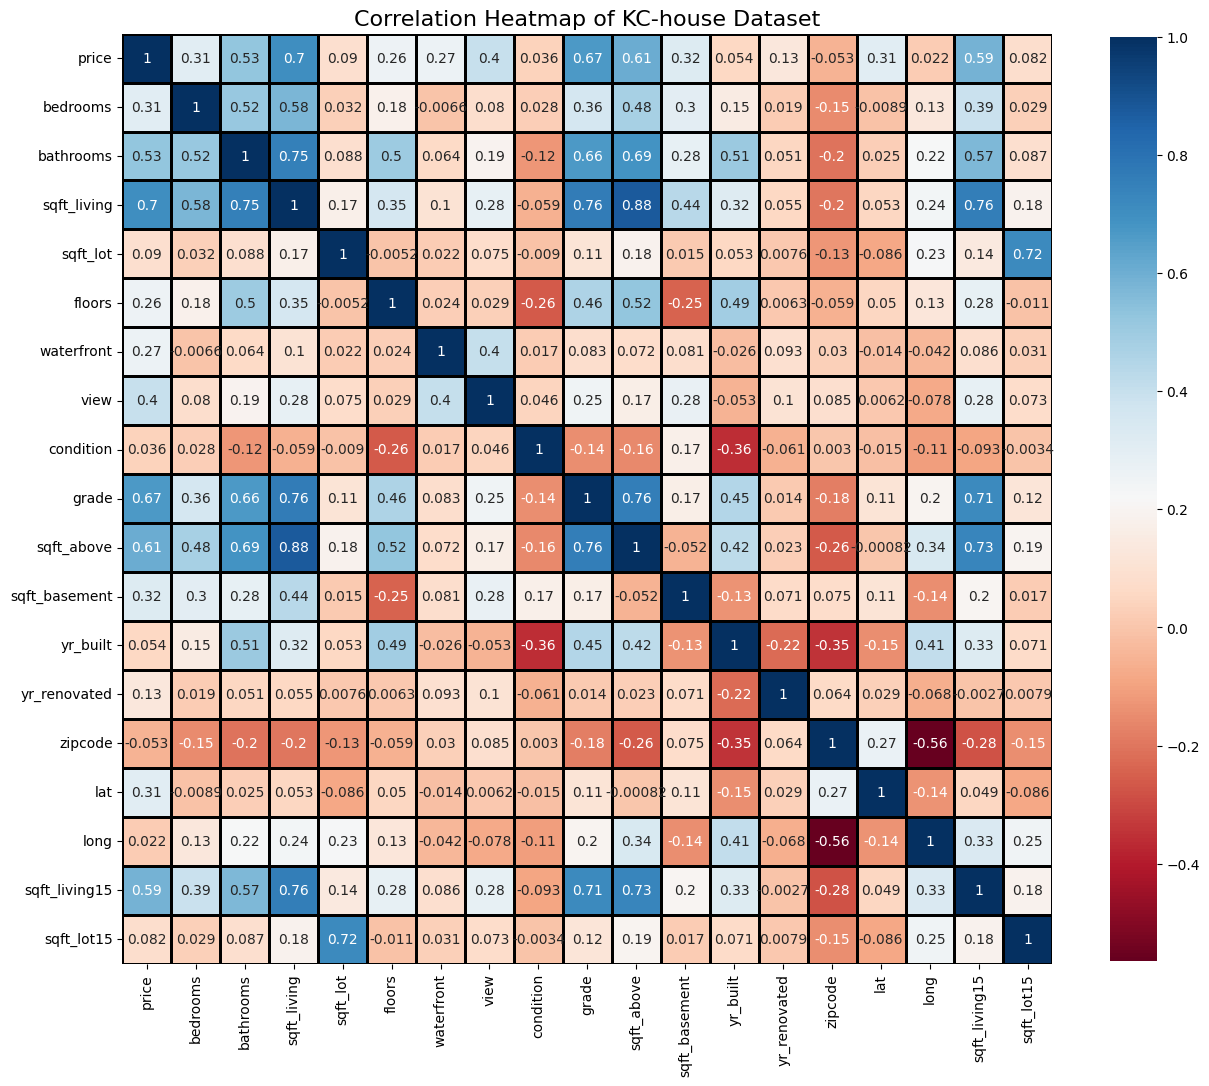

In [10]:
correlation_matrix = df[df.columns].corr() 
plt.figure(figsize=(15, 15)) 
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu', square=True,
            linewidths=1, linecolor='black', cbar_kws={"shrink": 0.8})

plt.title('Correlation Heatmap of KC-house Dataset', fontsize=16)
plt.show()

In [16]:
KC_input = df[[feature for feature in df.columns if feature != "price"]]
KC_target = df['price']
print (KC_input.shape, KC_target.shape)

(21613, 18) (21613,)


In [17]:
ss_transformer = StandardScaler()
KC_input_scaled = ss_transformer.fit_transform(KC_input)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(KC_input, 
                                                   KC_target,
                                                   test_size=0.1) 

# X_train, y_train, X_val, y_val
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                 test_size=0.1)

----------

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_26 (Dense)                │ (None, 64)             │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,161 (16.25 KB)

 Trainable params: 4,065 (15.88 KB)

 Non-trainable params: 96 (384.00 B)

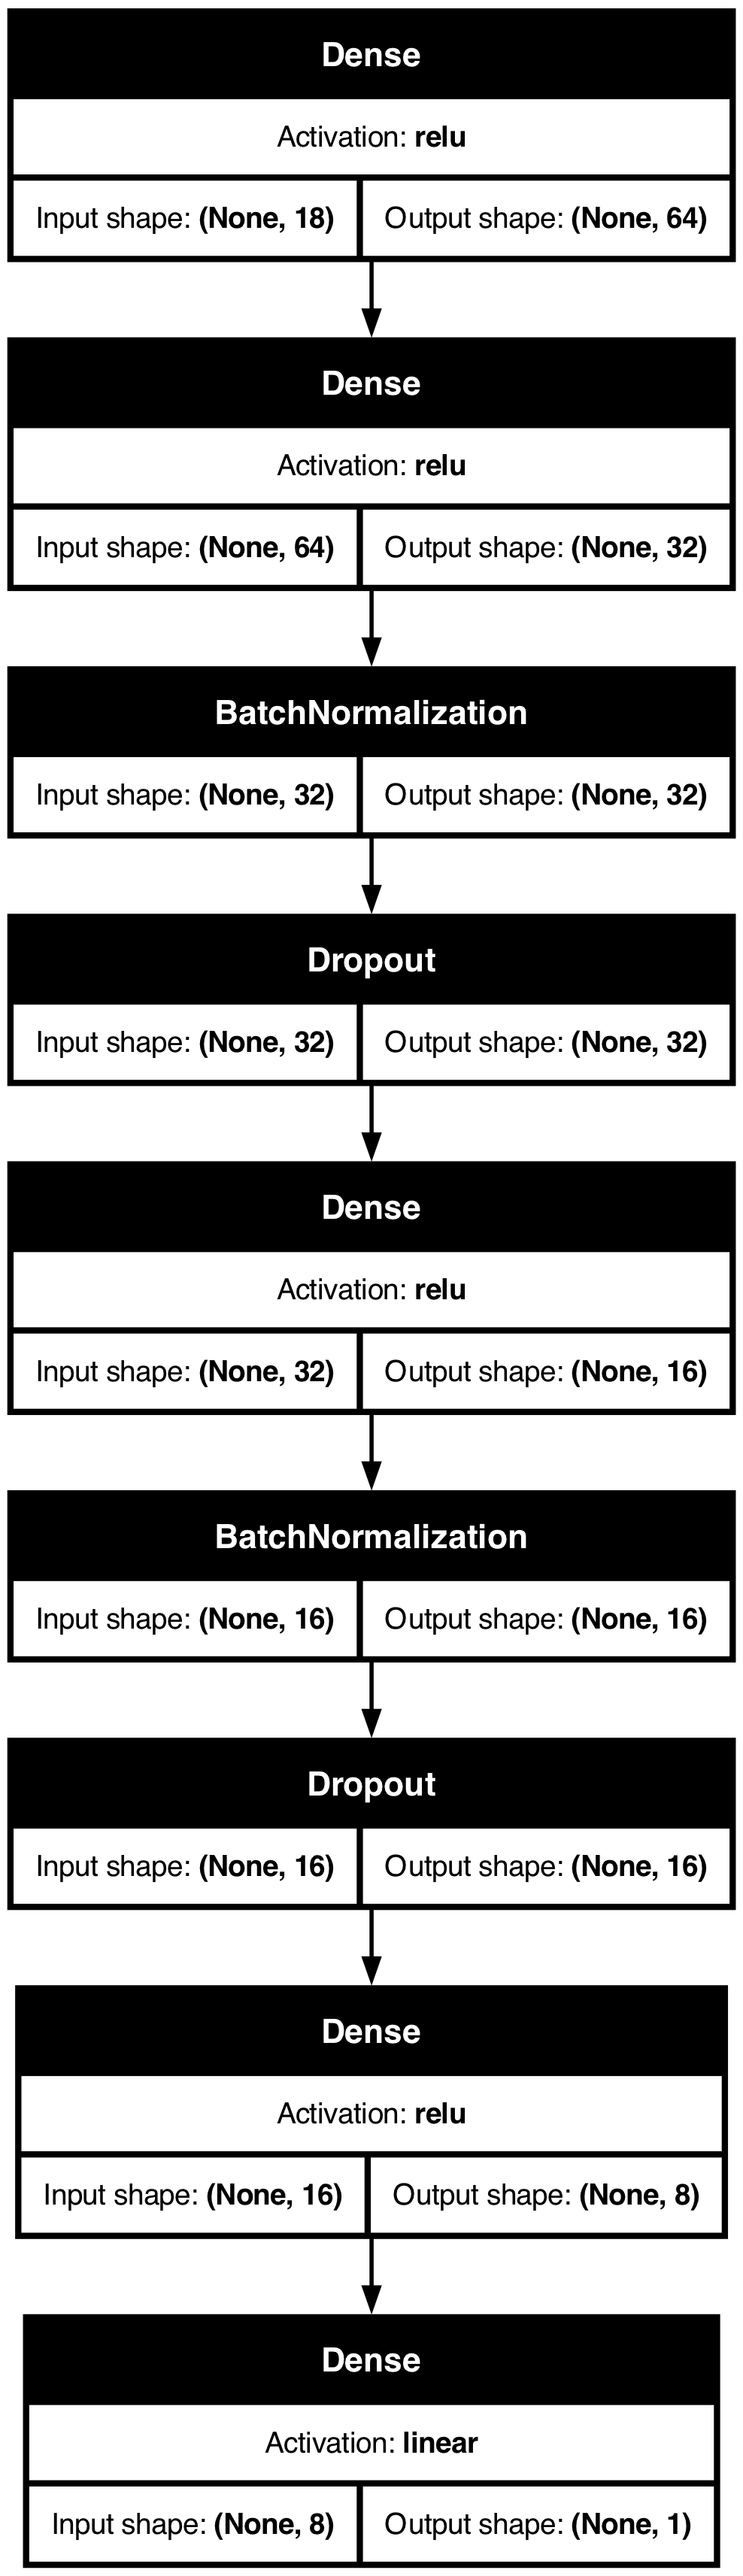

In [31]:
model = keras.Sequential([
    keras.layers.Dense(64, input_shape=(len([feature for feature in df.columns if feature != 'price']), ),
                      activation='relu'), 
    keras.layers.Dense(32, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1)
])

model.summary()
keras.utils.plot_model(model, show_shapes=True, show_layer_activations=True)

In [32]:
adam = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=adam, 
              loss='mse', metrics=['mse'])

In [34]:
history = model.fit(X_train, y_train, epochs=100, 
                    validation_data=(X_val, y_val)
                    # callbacks=early_stopping_cb
                   )

Epoch 1/100
548/548 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 63409745920.0000 - mse: 63409745920.0000 - val_loss: 125810802688.0000 - val_mse: 125810802688.0000
Epoch 2/100
548/548 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 57594875904.0000 - mse: 57594875904.0000 - val_loss: 70865584128.0000 - val_mse: 70865584128.0000
Epoch 3/100
548/548 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 60182224896.0000 - mse: 60182224896.0000 - val_loss: 80595779584.0000 - val_mse: 80595779584.0000
Epoch 4/100
548/548 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 61730672640.0000 - mse: 61730672640.0000 - val_loss: 68068016128.0000 - val_mse: 68068016128.0000
Epoch 5/100
548/548 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 61808951296.0000 - mse: 61808951296.0000 - val_loss: 55388258304.0000 - val_mse: 55388258304.0000
Epoch 6/100
548/548 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 65777455104.0000 - mse: 65777455104.0000 - val_loss: 135562133504.0000 - val_mse: 135562133504.0000
Epoch 7/100
548/548 ━━━━━━━━━━━━━━━━━━━━ 1

548/548 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 59142934528.0000 - mse: 59142934528.0000 - val_loss: 56955416576.0000 - val_mse: 56955416576.0000
Epoch 44/100
548/548 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 56080125952.0000 - mse: 56080125952.0000 - val_loss: 68538167296.0000 - val_mse: 68538167296.0000
Epoch 45/100
548/548 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 55381434368.0000 - mse: 55381434368.0000 - val_loss: 55707148288.0000 - val_mse: 55707148288.0000
Epoch 46/100
548/548 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 58285334528.0000 - mse: 58285334528.0000 - val_loss: 70491578368.0000 - val_mse: 70491578368.0000
Epoch 47/100
548/548 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 58255478784.0000 - mse: 58255478784.0000 - val_loss: 59621126144.0000 - val_mse: 59621126144.0000
Epoch 48/100
548/548 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 59071995904.0000 - mse: 59071995904.0000 - val_loss: 53917847552.0000 - val_mse: 53917847552.0000
Epoch 49/100
548/548 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step

548/548 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 58572476416.0000 - mse: 58572476416.0000 - val_loss: 65808420864.0000 - val_mse: 65808420864.0000
Epoch 86/100
548/548 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 56258498560.0000 - mse: 56258498560.0000 - val_loss: 58907893760.0000 - val_mse: 58907893760.0000
Epoch 87/100
548/548 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 60210290688.0000 - mse: 60210290688.0000 - val_loss: 68468006912.0000 - val_mse: 68468006912.0000
Epoch 88/100
548/548 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 57906806784.0000 - mse: 57906806784.0000 - val_loss: 284182904832.0000 - val_mse: 284182904832.0000
Epoch 89/100
548/548 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 56601690112.0000 - mse: 56601690112.0000 - val_loss: 52329181184.0000 - val_mse: 52329181184.0000
Epoch 90/100
548/548 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 55757275136.0000 - mse: 55757275136.0000 - val_loss: 100108238848.0000 - val_mse: 100108238848.0000
Epoch 91/100
548/548 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/

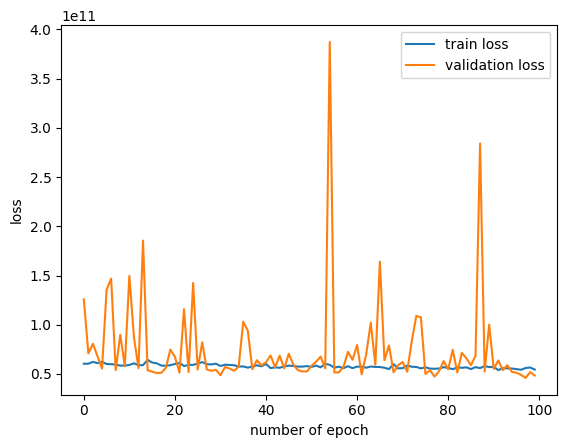

In [35]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('number of epoch')
plt.ylabel('loss')
plt.legend (['train loss', 'validation loss'])
plt.show() 

In [37]:
model_score = [model.evaluate(X_train, y_train), 
               model.evaluate(X_test, y_test),
             model.evaluate(X_val, y_val )]
print (f"train score, test score, val score : {model_score}")

548/548 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 43408113664.0000 - mse: 43408113664.0000
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 46571712512.0000 - mse: 46571712512.0000
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 50531942400.0000 - mse: 50531942400.0000
train score, test score, val score : [[43932442624.0, 43932442624.0], [46762209280.0, 46762209280.0], [48384946176.0, 48384946176.0]]
